In [1]:
# ich dachte ich kopiere hier einfach schonmal den Code von dem Python Intro rüber, dann gehts schneller, wenn wir hier wirklich anfangen dran zu arbeiten
%load_ext autoreload
%autoreload 2
#... startet bei Iteration 103

In [6]:
data = np.random.randint(0,101,(100,2))
centers = np.random.randint(0,101,(4,2))

In [7]:
clusters = np.expand_dims(centers, axis=1)
data = np.expand_dims(data, axis=0)

eucl = np.linalg.norm(clusters - data, axis=2)

labels = np.argmin(eucl, axis = 0)

In [8]:
def calc_distance(data,centers):
    clusters = np.expand_dims(centers, axis=1)
    data = np.expand_dims(data, axis=0)

    eucl = np.linalg.norm(clusters - data, axis=2)

    labels = np.argmin(eucl, axis = 0)
    return labels

In [9]:
calc_distance(data, 3)

AxisError: axis 1 is out of bounds for array of dimension 1

In [1]:
# k-means mit scikit learn library
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import data_exploration as de
import data_cleanup as dc
from time import time
import functions as fun

In [3]:
# Cleanup
data = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_WT_Nutlin_2018.csv')
dat1 = dc.aufteilung_mut_pos(dc.min_max_norm(dc.z_transform(data)))
# Distance Matrix
distance_mat: pd.DataFrame = de.dms_distance_matrix(dat1)
distance_mat

AS_old,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
AS_old,,,,,,,,,,,,,,,,,,,,
A,0.000000,1.845023,0.377937,0.422263,0.484488,0.453102,0.885071,1.315256,0.450027,0.319937,0.647783,0.579572,0.376269,0.303319,0.615500,0.382538,0.532855,1.383635,0.474408,1.654408
C,1.845023,0.000000,1.739546,1.693797,1.568963,1.592610,1.195729,0.893504,2.124593,1.716395,1.332638,1.456023,1.723635,1.877115,1.411988,1.696741,1.529327,0.776950,1.679513,0.862319
D,0.377937,1.739546,0.000000,0.355713,0.436921,0.451473,0.787570,1.179766,0.478785,0.292915,0.587418,0.604502,0.370503,0.396478,0.585682,0.333661,0.418055,1.256460,0.420888,1.565089
E,0.422263,1.693797,0.355713,0.000000,0.411267,0.418142,0.699191,1.144296,0.631467,0.316790,0.551906,0.503716,0.360214,0.427622,0.538216,0.277137,0.355378,1.200096,0.402335,1.474623
F,0.484488,1.568963,0.436921,0.411267,0.000000,0.360663,0.557544,1.053084,0.725772,0.425806,0.483683,0.490412,0.384107,0.530136,0.444300,0.430056,0.385896,1.095778,0.308844,1.303579
G,0.453102,1.592610,0.451473,0.418142,0.360663,0.000000,0.659749,1.109575,0.688432,0.402772,0.511603,0.458746,0.404120,0.410635,0.519944,0.370723,0.379697,1.143112,0.489493,1.403907
H,0.885071,1.195729,0.787570,0.699191,0.557544,0.659749,0.000000,0.756021,1.138538,0.772620,0.492955,0.602867,0.752086,0.932305,0.591549,0.743994,0.604865,0.816655,0.681989,0.986374
I,1.315256,0.893504,1.179766,1.144296,1.053084,1.109575,0.756021,0.000000,1.560230,1.125003,0.826347,1.008605,1.185265,1.345954,0.898532,1.170509,1.012057,0.527745,1.109897,0.819301
K,0.450027,2.124593,0.478785,0.631467,0.725772,0.688432,1.138538,1.560230,0.000000,0.541761,0.949036,0.928907,0.554754,0.464411,0.937452,0.554908,0.743065,1.612262,0.649373,1.912586


In [15]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [10]:
kmeans = KMeans(n_clusters=8, n_init='auto').fit(distance_mat)
# pca -> scatter plott

C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
metrics.silhouette_score(distance_mat, [x for x in range(2)])

ValueError: Found input variables with inconsistent numbers of samples: [20, 2]

In [ ]:
#ENNOS TURN

In [7]:
import numpy as np
import data_cleanup as dc
import data_exploration as de
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

aa = pd.read_csv('../DMS_data/aminoacids.csv')

gia_null_eto: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')
norm_frame = dc.aufteilung_mut_pos(dc.norm(gia_null_eto))

In [3]:
dist_chem = de.aa_distance_matrix(aa)
dist_p53 = de.dms_distance_matrix(norm_frame)

feature_matrix_p53 = dc.rmv_na(de.mean_substitutions(norm_frame))

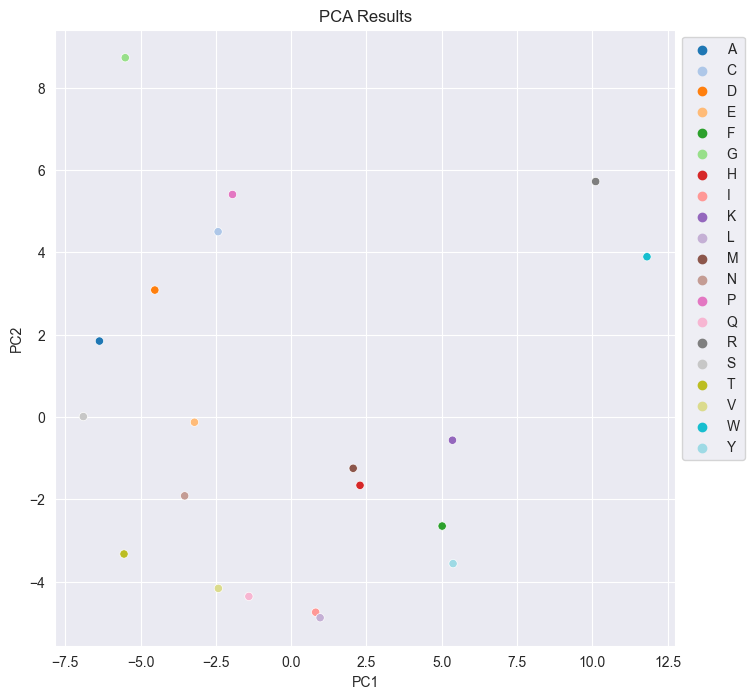

In [10]:

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dist_chem.values)

# Create a color map for the letters
letters = dist_chem.columns
colors = sns.color_palette('tab20', len(letters))

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Letter'] = letters

# Plot the PCA results
plt.figure(figsize=(8, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Letter', palette=colors).set(title="PCA Results")

# Show the plot
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
## KMEANS
from sklearn.cluster import KMeans
import numpy as np

def kmeans_clustering(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data)

    converged = False
    prev_labels = None
    iter_count = 0
    while not converged:
        labels = kmeans.predict(data)
        if np.array_equal(labels, prev_labels):
            converged = True
        else:
            prev_labels = labels
            kmeans.cluster_centers_ = np.array([data[labels == i].mean(axis=0) for i in range(num_clusters)])

        iter_count += 1
        if iter_count >= kmeans.max_iter:
            converged = True

    return kmeans.labels_

# Usage example
# data: your feature matrix
# num_clusters: number of clusters to create
labels = kmeans_clustering(data, 3)

C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

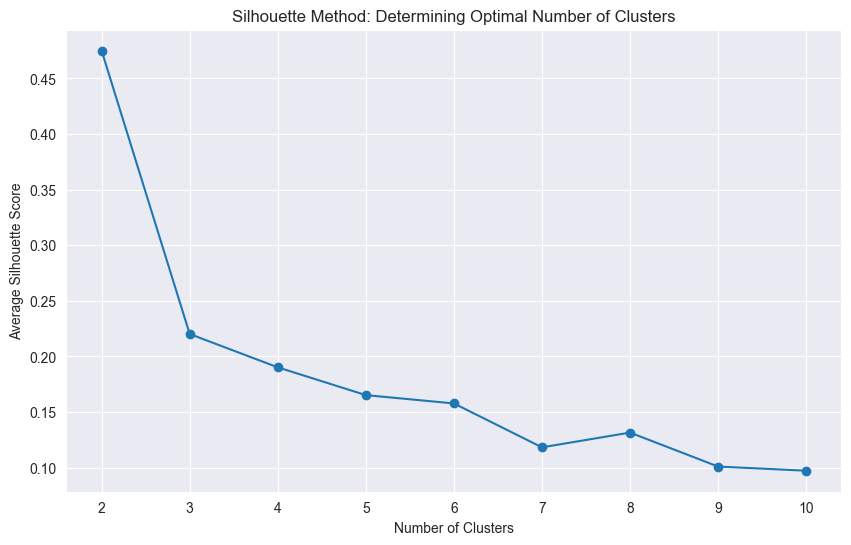

Optimal number of clusters: 2


In [24]:
## TEST FOR OPTIMAL AMOUNT OF CLUSTERS

def determine_optimal_clusters(data, max_clusters):
    silhouette_scores = []  # List to store the silhouette scores for different cluster numbers

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plotting the Silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score')
    plt.title('Silhouette Method: Determining Optimal Number of Clusters')
    plt.show()

    # Find the optimal number of clusters using the maximum Silhouette score
    optimal_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 to account for zero-based indexing

    return optimal_clusters


# Example usage
data = feature_matrix_p53
optimal_clusters = determine_optimal_clusters(data, max_clusters=10)
print('Optimal number of clusters:', optimal_clusters)

In [21]:
## PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dist_chem.values)

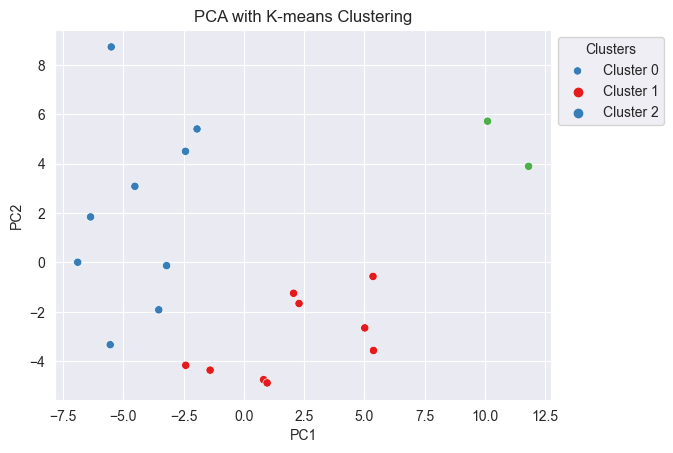

In [22]:
## VISUALIZATION
# Create a DataFrame for visualization
df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df['Cluster'] = clusters

# Define the cluster colors
cluster_colors = sns.color_palette('Set1', n_colors=len(np.unique(clusters)))

# Plot the PCA results with color-coded clusters
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette=cluster_colors).set(
    title="PCA with K-means Clustering")

# Create a legend with cluster labels
legend_labels = ['Cluster {}'.format(i) for i in np.unique(clusters)]
plt.legend(title='Clusters', labels=legend_labels, bbox_to_anchor=(1, 1))

plt.show()